## 4.5 1차원 로지스틱 회귀 사용하기

In [1]:
import numpy as np # 관련 라이브러리를 불러옵니다
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.01 # 하이퍼파라미터를 설정합니다
training_epochs = 1000

def sigmoid(x): # 시그모이드 함수를 계산하기 위한 도우미 함수를 정의합니다
    return 1. / (1. + np.exp(-x))

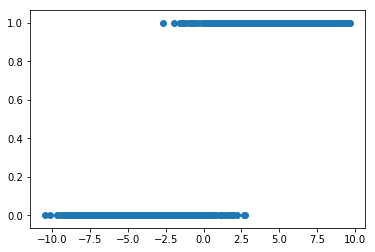

In [3]:
x1 = np.random.normal(-4, 2, 1000) # 가짜 데이터를 초기화합니다
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs, ys) # 데이터를 시각화합니다

In [5]:
X = tf.placeholder(tf.float32, shape=(None,), name="x") # 입력/출력 플레이스홀더를 정의합니다
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0.], name="parameter", trainable=True) # 파라미터 노드를 정의합니다
y_model = tf.sigmoid(w[1] * X + w[0]) # 텐서플로우의 시그모이드 함수를 이용해 모델을 정의합니다
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model)) # 크로스 엔트로피 비용 함수를 정의합니다

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # 최소화기를 정의합니다

In [6]:
with tf.Session() as sess: # 세션을 열고 모든 변수들을 정의합니다
    sess.run(tf.global_variables_initializer())
    prev_err = 0 # 이전 오류를 추적하기 위한 변수를 정의합니다
    for epoch in range(training_epochs): # 수렴이 되거나 에포크 최대치에 도달할 때까지 반복합니다
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})	 # 비용을 계산하고 학습 파라미터를 업데이트합니다
        print(epoch, err)
        if abs(prev_err - err) < 0.0001: # 수렴 정도를 체크합니다. 반복 시 0.01% 미만의 변화가 일어난다면 학습을 중단합니다
            break
        prev_err = err # 이전의 오류 값을 업데이트합니다
    w_val = sess.run(w, {X: xs, Y: ys}) # 학습된 파라미터 값을 얻습니다

0 0.69314724
1 0.65343386
2 0.6176934
3 0.58549935
4 0.5564562
5 0.5302046
6 0.50642174
7 0.48482135
8 0.46515095
9 0.44718906
10 0.43074208
11 0.41564098
12 0.40173832
13 0.38890535
14 0.37702963
15 0.36601275
16 0.3557686
17 0.34622127
18 0.33730423
19 0.32895857
20 0.32113227
21 0.31377918
22 0.30685824
23 0.3003329
24 0.29417056
25 0.28834182
26 0.2828205
27 0.27758294
28 0.27260777
29 0.26787576
30 0.2633694
31 0.25907293
32 0.25497186
33 0.25105304
34 0.24730448
35 0.24371521
36 0.24027519
37 0.23697513
38 0.2338066
39 0.23076174
40 0.22783333
41 0.22501475
42 0.22229974
43 0.21968271
44 0.21715826
45 0.21472152
46 0.21236782
47 0.210093
48 0.20789303
49 0.20576422
50 0.20370308
51 0.20170635
52 0.19977102
53 0.19789416
54 0.19607316
55 0.19430552
56 0.1925888
57 0.19092086
58 0.18929951
59 0.18772283
60 0.18618895
61 0.18469608
62 0.18324256
63 0.18182683
64 0.18044738
65 0.17910281
66 0.17779176
67 0.17651297
68 0.17526522
69 0.17404735
70 0.17285831
71 0.171697
72 0.17056249
7

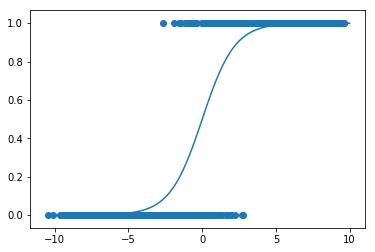

In [7]:
all_xs = np.linspace(-10, 10, 100) # 학습된 시그모이드 함수를 그려줍니다
plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])))
plt.scatter(xs, ys) # 데이터를 시각화합니다
plt.show()